In [53]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv('HR_Analytics.csv')

In [54]:
# top 5 rows of data
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [55]:
# checking the shape of the data
print("The shape of the data is",df.shape)

The shape of the data is (1480, 38)


In [56]:
#column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [57]:
#statistical information
print("summary of statistics")
df.describe()

summary of statistics


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [58]:
#Data types
df.dtypes

,0
EmpID,object
Age,int64
AgeGroup,object
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object


In [59]:
# for numeric columns
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [60]:
#for categorical columns
df.describe(include=['object'])

,EmpID,AgeGroup,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,SalarySlab,Over18,OverTime
count,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480,1480
unique,1470,5,2,4,3,6,2,9,3,4,1,2
top,RM1467,26-35,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Upto 5k,Y,No
freq,2,611,1242,1042,967,607,889,329,679,753,1480,1062


In [61]:
# Remove duplicate employee numbers, keeping only the first occurrence
df = df.drop_duplicates(subset='EmployeeNumber', keep='first')

print("Duplicates removed. Total rows after cleaning:", len(df))

Duplicates removed. Total rows after cleaning: 1470


In [62]:
# handling misiing values
print("Total nulll values sum")
df.isnull().sum()

Total nulll values sum


,0
EmpID,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0


In [63]:
# handling misiing values
len(df)

1470

In [64]:
# Check how many duplicate rows exist
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [65]:
from os import remove
# address duplicates
df.duplicated().sum()

# decided to remove duplicates
df.drop_duplicates(inplace=True)

agaibn = len(df)
print("The total row count is after remove the dublicates :",agaibn)

The total row count is after remove the dublicates : 1470


In [66]:
for col in df.columns:
    if df[col].dtype == 'object':
        # FIX: Direct assignment for categorical imputation
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # FIX: Direct assignment for numeric (mean/zero) imputation
        df[col] = df[col].fillna(0)  # Corrected: Use 0 directly

print("\n Null values handled successfully!")


 Null values handled successfully!


In [67]:
# Drop columns not needed for prediction
df = df.drop(['EmpID'], axis=1)
print("Dropped EmpID column.")


Dropped EmpID column.


/tmp/ipython-input-3202079247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


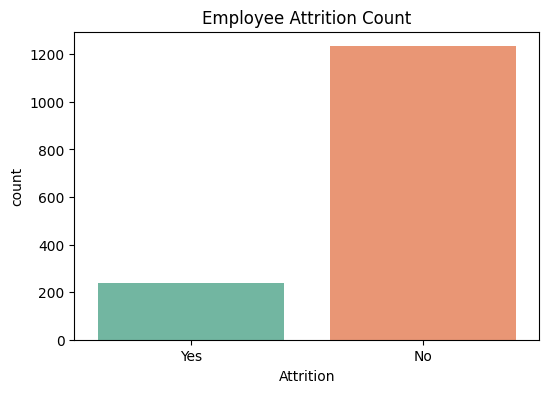

In [68]:
# Step 5. Exploratory Data Analysis (EDA)
# Step 5: Exploratory Data Analysis (EDA)

# Attrition Count
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Employee Attrition Count')
plt.show()

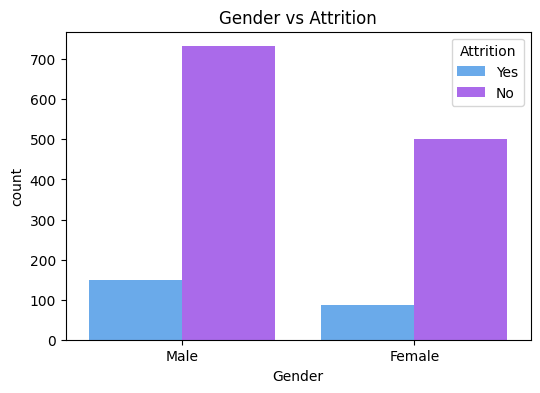

In [69]:
# Gender vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='cool')
plt.title('Gender vs Attrition')
plt.show()

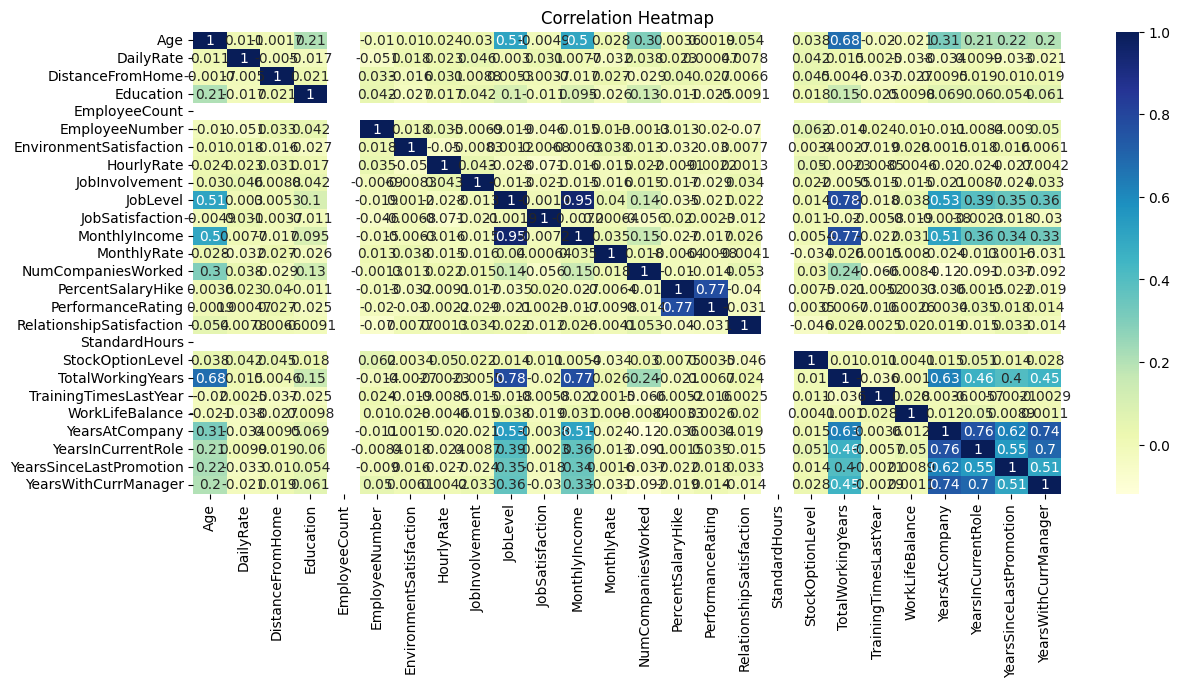

In [70]:
# Correlation Heatmap
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [71]:
# Data Preprocessing for Machine Learning
# Step 6: Convert Categorical Columns to Numeric (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate Features (X) and Target (y)
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

print("Data encoding complete!")
print("X shape:", X.shape)
print("y shape:", y.shape)

Data encoding complete!
X shape: (1470, 55)
y shape: (1470,)


In [72]:
# Train-Test Split
# Step 7: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split complete!")

Data split complete!


In [73]:
# Step 8. Model Training (Random Forest)
# Step 8: Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [74]:
# Model Evaluation
# Step 9: Model Evaluation
y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))



 Accuracy: 0.8333333333333334

 Confusion Matrix:
 [[239   2]
 [ 47   6]]

 Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.99      0.91       241
        True       0.75      0.11      0.20        53

    accuracy                           0.83       294
   macro avg       0.79      0.55      0.55       294
weighted avg       0.82      0.83      0.78       294



/tmp/ipython-input-2880335814.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10), palette='viridis')


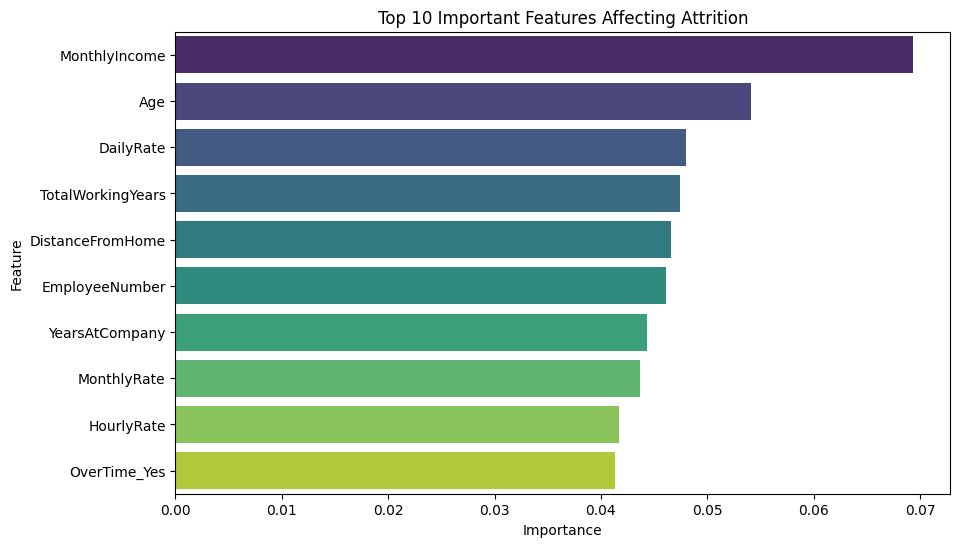

In [75]:
# Feature Importance Visualization
# Step 10: Feature Importance
importances = model.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10), palette='viridis')
plt.title('Top 10 Important Features Affecting Attrition')
plt.show()

In [76]:
# Get predictions and probabilities
df_encoded['Attrition_Predicted'] = model.predict(X)
df_encoded['Attrition_Probability'] = model.predict_proba(X)[:, 1]

#Create readable Risk Levels (optional)
df_encoded['Risk_Level'] = pd.cut(
    df_encoded['Attrition_Probability'],
    bins=[0, 0.33, 0.66, 1],
    labels=['Low', 'Medium', 'High']
)

#Confirm new columns are added
print("New Columns Added:")
print(df_encoded[['Attrition_Predicted', 'Attrition_Probability', 'Risk_Level']].head())



New Columns Added:
   Attrition_Predicted  Attrition_Probability Risk_Level
0                 True                   0.81       High
1                False                   0.24        Low
2                 True                   0.92       High
3                False                   0.19        Low
4                 True                   0.78       High


In [77]:
print("🔹 Total Columns:", len(df_encoded.columns))
print("\n🔹 Columns List:")
for col in df_encoded.columns:
    print(col)

🔹 Total Columns: 59

🔹 Columns List:
Age
DailyRate
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
AgeGroup_26-35
AgeGroup_36-45
AgeGroup_46-55
AgeGroup_55+
Attrition_Yes
BusinessTravel_TravelRarely
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Research & Development
Department_Sales
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
Gender_Male
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales